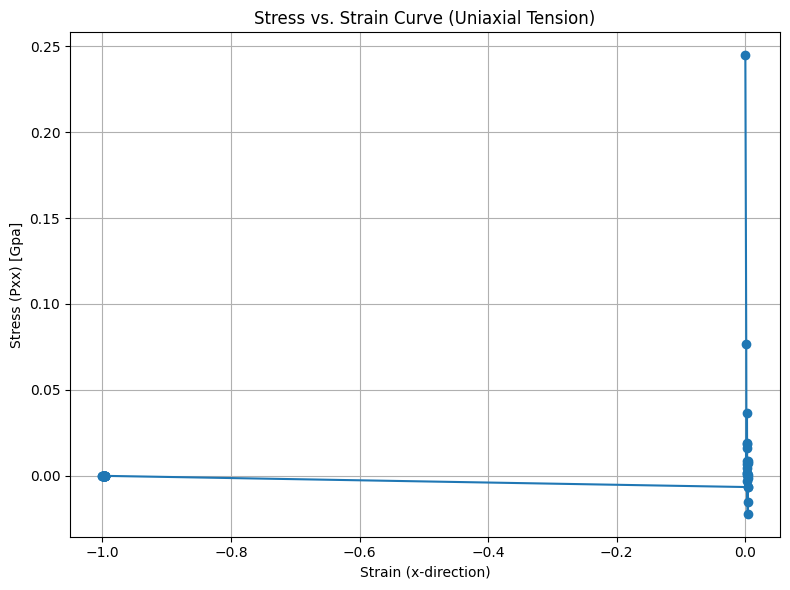

In [5]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Load log.lammps file
file_path = "log.lammps"  # Adjust path if needed

# Read file
with open(file_path, "r") as file:
    lines = file.readlines()

# Extract thermo output lines
data_lines = []
capture = False

for line in lines:
    # Start capturing when a line of numeric values is detected
    if re.match(r"^\s*\d+\s+[\dEe\.\s\+\-]+$", line):
        capture = True
    if capture:
        if re.match(r"^\s*\d+\s+[\dEe\.\s\+\-]+$", line):
            data_lines.append(line.strip())
        else:
            # Stop when non-numeric line appears again
            capture = False

# Define column names based on thermo_style
columns = ["Step", "lx", "ly", "lz", "Press", "Pxx", "Pyy", "Pzz", "PE", "Temp"]

# Parse data into DataFrame
data = [list(map(float, re.split(r"\s+", line))) for line in data_lines]
df = pd.DataFrame(data, columns=columns)
# Convert Pxx from bar to GPa
df["Pxx_GPa"] = df["Pxx"] * 0.0001


# Compute strain in x-direction
lx0 = df["lx"].iloc[0]
df["Strain_x"] = (df["lx"] - lx0) / lx0

# Plot stress vs strain
plt.figure(figsize=(8, 6))
plt.plot(df["Strain_x"], df["Pxx_GPa"], marker='o', linestyle='-')
plt.xlabel("Strain (x-direction)")
plt.ylabel("Stress (Pxx) [Gpa]")
plt.title("Stress vs. Strain Curve (Uniaxial Tension)")
plt.grid(True)
plt.tight_layout()
plt.show()
